# Examine direct and remote skill in CAFE-f1

In [1]:
%cd /OSM/CBR/OA_DCFP/work/squ027/doppyo/
! python setup.py install >/dev/null

/OSM/CBR/OA_DCFP/work/squ027/doppyo
zip_safe flag not set; analyzing archive contents...


In [2]:
from doppyo import utils, skill, diagnostic

import glob
import numpy as np
import xarray as xr
import pandas as pd
import dask.bag as db

import cartopy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Notebook specific -----
%matplotlib inline

In [3]:
import dask
import distributed
client = distributed.Client('tcp://oa-32-cdc.nexus.csiro.au:8786')
client

Client Scheduler: tcp://oa-32-cdc.nexus.csiro.au:8786 Dashboard: http://oa-32-cdc.nexus.csiro.au:8787/status,Cluster Workers: 80 Cores: 80 Memory: 677.59 GB


In [4]:
# Reload doppyo -----
import importlib
utils = importlib.reload(utils)
diagnostic = importlib.reload(diagnostic)
skill = importlib.reload(skill)

In [5]:
saveloc = '/OSM/CBR/OA_DCFP/work/squ027/squire_scratch/projects/s2d_Boulder/figures/'

In [6]:
# Define sequential colormap -----
colors = [(0.0315,    0.1138,    0.3452),
    (0.0483,    0.1196,    0.3737),
    (0.0645,    0.1258,    0.4015),
    (0.0791,    0.1329,    0.4277),
    (0.0926,    0.1399,    0.4528),
    (0.1053,    0.1468,    0.4772),
    (0.1170,    0.1570,    0.5003),
    (0.1278,    0.1672,    0.5223),
    (0.1351,    0.1760,    0.5398),
    (0.1403,    0.1854,    0.5560),
    (0.1433,    0.1956,    0.5708),
    (0.1447,    0.2069,    0.5816),
    (0.1457,    0.2189,    0.5913),
    (0.1456,    0.2331,    0.6001),
    (0.1448,    0.2476,    0.6085),
    (0.1429,    0.2622,    0.6165),
    (0.1414,    0.2779,    0.6230),
    (0.1402,    0.2940,    0.6289),
    (0.1396,    0.3096,    0.6349),
    (0.1386,    0.3257,    0.6409),
    (0.1367,    0.3432,    0.6472),
    (0.1356,    0.3608,    0.6550),
    (0.1351,    0.3786,    0.6639),
    (0.1345,    0.3964,    0.6728),
    (0.1337,    0.4146,    0.6821),
    (0.1324,    0.4346,    0.6933),
    (0.1309,    0.4541,    0.7045),
    (0.1291,    0.4727,    0.7160),
    (0.1285,    0.4931,    0.7257),
    (0.1282,    0.5141,    0.7348),
    (0.1285,    0.5335,    0.7440),
    (0.1294,    0.5527,    0.7516),
    (0.1314,    0.5711,    0.7564),
    (0.1373,    0.5897,    0.7605),
    (0.1454,    0.6083,    0.7643),
    (0.1617,    0.6261,    0.7683),
    (0.1796,    0.6438,    0.7720),
    (0.2008,    0.6619,    0.7746),
    (0.2243,    0.6794,    0.7780),
    (0.2499,    0.6964,    0.7822),
    (0.2753,    0.7127,    0.7850),
    (0.3009,    0.7287,    0.7875),
    (0.3284,    0.7432,    0.7907),
    (0.3568,    0.7571,    0.7935),
    (0.3861,    0.7703,    0.7958),
    (0.4187,    0.7818,    0.7981),
    (0.4525,    0.7927,    0.8004),
    (0.4876,    0.8059,    0.8026),
    (0.5229,    0.8188,    0.8058),
    (0.5586,    0.8312,    0.8111),
    (0.5951,    0.8439,    0.8163),
    (0.6321,    0.8569,    0.8216),
    (0.6672,    0.8701,    0.8293),
    (0.7020,    0.8833,    0.8375),
    (0.7363,    0.8965,    0.8467),
    (0.7693,    0.9094,    0.8562),
    (0.8012,    0.9223,    0.8661),
    (0.8302,    0.9338,    0.8761),
    (0.8580,    0.9447,    0.8862),
    (0.8815,    0.9532,    0.8962),
    (0.9028,    0.9613,    0.9060),
    (0.9207,    0.9686,    0.9156),
    (0.9565,    0.9828,    0.9521),
    (1.0000,    1.0000,    1.0000),
    (1.0000,    0.9999,    0.9711),
    (1.0000,    0.9998,    0.9422),
    (1.0000,    0.9996,    0.9134),
    (1.0000,    0.9995,    0.8845),
    (1.0000,    0.9994,    0.8556),
    (1.0000,    0.9993,    0.8267),
    (1.0000,    0.9991,    0.7979),
    (1.0000,    0.9990,    0.7690),
    (1.0000,    0.9989,    0.7401),
    (1.0000,    0.9966,    0.7216),
    (1.0000,    0.9907,    0.7068),
    (1.0000,    0.9836,    0.6928),
    (1.0000,    0.9744,    0.6767),
    (1.0000,    0.9643,    0.6614),
    (1.0000,    0.9528,    0.6476),
    (0.9984,    0.9397,    0.6322),
    (0.9961,    0.9259,    0.6161),
    (0.9961,    0.9120,    0.6022),
    (0.9961,    0.8982,    0.5878),
    (0.9961,    0.8844,    0.5717),
    (0.9961,    0.8706,    0.5542),
    (0.9961,    0.8568,    0.5358),
    (0.9961,    0.8390,    0.5174),
    (0.9961,    0.8205,    0.4990),
    (0.9961,    0.8021,    0.4805),
    (0.9950,    0.7826,    0.4611),
    (0.9927,    0.7619,    0.4403),
    (0.9922,    0.7394,    0.4231),
    (0.9922,    0.7165,    0.4070),
    (0.9922,    0.6958,    0.3908),
    (0.9913,    0.6743,    0.3755),
    (0.9890,    0.6512,    0.3617),
    (0.9867,    0.6267,    0.3494),
    (0.9844,    0.6014,    0.3379),
    (0.9821,    0.5760,    0.3264),
    (0.9793,    0.5501,    0.3148),
    (0.9747,    0.5225,    0.3033),
    (0.9701,    0.4961,    0.2918),
    (0.9655,    0.4708,    0.2803),
    (0.9608,    0.4474,    0.2707),
    (0.9559,    0.4246,    0.2612),
    (0.9490,    0.4039,    0.2497),
    (0.9421,    0.3822,    0.2382),
    (0.9352,    0.3592,    0.2266),
    (0.9283,    0.3395,    0.2151),
    (0.9213,    0.3210,    0.2036),
    (0.9097,    0.3003,    0.1921),
    (0.8990,    0.2803,    0.1813),
    (0.8898,    0.2619,    0.1721),
    (0.8777,    0.2420,    0.1643),
    (0.8639,    0.2213,    0.1574),
    (0.8522,    0.2027,    0.1547),
    (0.8401,    0.1843,    0.1529),
    (0.8263,    0.1658,    0.1529),
    (0.8113,    0.1474,    0.1518),
    (0.7952,    0.1290,    0.1495),
    (0.7772,    0.1106,    0.1490),
    (0.7585,    0.0921,    0.1490),
    (0.7378,    0.0737,    0.1490),
    (0.7162,    0.0553,    0.1490),
    (0.6931,    0.0369,    0.1490),
    (0.6701,    0.0184,    0.1490),
    (0.6471,         0,    0.1490)]

cmap_name = 'squire_div'
seq = matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))
seq.set_bad('g',1.)

In [7]:
def plot_fields(data, title, headings, vmin, vmax, cmin=None, cmax=None,
                ncol=2, mult_row=1, mult_col=1, mult_cshift=1, contour=False, cmap='viridis', invert=False):
    """ Plots tiles of figures """
    
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 12})

    nrow = int(np.ceil(len(data)/ncol));

    fig = plt.figure(figsize=(11*mult_col, nrow*4*mult_row))
        
    count = 1
    for idx,dat in enumerate(data):
        if ('lat' in dat.dims) and ('lon' in dat.dims):
            trans = cartopy.crs.PlateCarree()
            ax = plt.subplot(nrow, ncol, count, projection=cartopy.crs.PlateCarree(central_longitude=180))
            ax.coastlines(color='black')
            extent = [dat.lon.min(), dat.lon.max(), 
                      dat.lat.min(), dat.lat.max()]

            if contour is True:
                if cmin is not None:
                    im = ax.contourf(dat.lon, dat.lat, dat, np.linspace(vmin,vmax,21), origin='lower', transform=trans, 
                                  vmin=vmin, vmax=vmax, cmap=cmap, extend='both')
                    ax.contour(dat.lon, dat.lat, dat, np.linspace(cmin,cmax,11), origin='lower', transform=trans,
                              colors='w', linewidths=2)
                    ax.contour(dat.lon, dat.lat, dat, np.linspace(cmin,cmax,11), origin='lower', transform=trans,
                              colors='k', linewidths=1)
                else:
                    im = ax.contourf(dat.lon, dat.lat, dat, np.linspace(vmin,vmax,20), origin='lower', transform=trans, 
                                  vmin=vmin, vmax=vmax, cmap=cmap, extend='both')
            else:
                im = ax.imshow(dat, origin='lower', extent=extent, transform=trans, vmin=vmin, vmax=vmax, cmap=cmap)

            gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
            gl.xlines = False
            gl.ylines = False
            gl.xlabels_top = False
            if count % ncol == 0:
                gl.ylabels_left = False
            elif (count+ncol-1) % ncol == 0: 
                gl.ylabels_right = False
            else:
                gl.ylabels_left = False
                gl.ylabels_right = False
            gl.xlocator = mticker.FixedLocator([-90, 0, 90, 180])
            gl.ylocator = mticker.FixedLocator([-90, -60, 0, 60, 90])
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            ax.set_title(headings[idx])
        else:
            ax = plt.subplot(nrow, ncol, count)
            if 'lat' in dat.dims:
                x_plt = dat['lat']
                y_plt = dat[utils.find_other_dims(dat,'lat')[0]]
                # if dat.get_axis_num('lat') > 0:
                #     dat = dat.transpose()
            elif 'lon' in dat.dims:
                x_plt = dat['lon']
                y_plt = dat[utils.find_other_dims(dat,'lon')[0]]
                # if dat.get_axis_num('lon') > 0:
                #     dat = dat.transpose()
            else: 
                x_plt = dat[dat.dims[1]]
                y_plt = dat[dat.dims[0]]
                
            extent = [x_plt.min(), x_plt.max(), 
                      y_plt.min(), y_plt.max()]
            
            if contour is True:
                if cmin is not None:
                    im = ax.contourf(x_plt, y_plt, dat, levels=np.linspace(vmin,vmax,21), vmin=vmin, vmax=vmax, cmap=cmap)
                    ax.contour(x_plt, y_plt, dat, levels=np.linspace(cmin,cmax,11), colors='w', linewidths=2)
                    ax.contour(x_plt, y_plt, dat, levels=np.linspace(cmin,cmax,11), colors='k', linewidths=1)
                else:
                    im = ax.contourf(x_plt, y_plt, dat, levels=np.linspace(vmin,vmax,20), vmin=vmin, vmax=vmax, cmap=cmap)
            else:
                im = ax.imshow(dat, origin='lower', extent=extent, vmin=vmin, vmax=vmax, cmap=cmap)
                
            if count % ncol == 0:
                ax.yaxis.tick_right()
            elif (count+ncol-1) % ncol == 0: 
                ax.set_ylabel(y_plt.dims[0])
            else:
                ax.set_yticks([])
            if idx / ncol >= nrow - 1:
                ax.set_xlabel(x_plt.dims[0])
            ax.set_title(headings[idx], fontsize=16)
            
            if invert:
                ax.invert_yaxis()

        count += 1

    plt.tight_layout()
    fig.subplots_adjust(bottom=mult_cshift*0.16)
    cbar_ax = fig.add_axes([0.15, 0.13, 0.7, 0.020])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='both');
    cbar_ax.set_xlabel(title, rotation=0, labelpad=15);
    cbar.set_ticks(np.linspace(vmin,vmax,5))

# Load SST data
## Load the forecast data and observations

In [8]:
folder = '/OSM/CBR/OA_DCFP/data/intermediate_products/squ027/'
file = 'cafe.fcst_2yr.v1.sst.bundle.monthly.native_grid.20030101_20151201.nc'

sst_f_raw = xr.open_dataset(folder + file)['sst']

folder = '/OSM/CBR/OA_DCFP/data/intermediate_products/squ027/'
file = 'HadISST.sst.monthly.cafe_grid.18700101_20180201.nc'

sst_o_raw = xr.open_dataset(folder + file)['sst']

#### Only keep the parts of both datasets where neither are nans

In [9]:
# Function to fill common nans -----
def common_nans(da_1, da_2, return_da=1):
    """ Returns da_1 or da_2 with nans where either da_1 or da_2 contain nans """

    # Find overlapping time -----
    tmin = xr.concat([da_1['time'].min(),da_2['time'].min()], dim='time').max()
    tmax = xr.concat([da_1['time'].max(),da_2['time'].max()], dim='time').min()
    tmin_s = f'{tmin.dt.year.values}-{tmin.dt.month.values}-{tmin.dt.day.values}'
    tmax_s = f'{tmax.dt.year.values}-{tmax.dt.month.values}-{tmax.dt.day.values}'
    
    da1 = da_1.sel(time=slice(tmin_s,tmax_s))
    da2 = da_2.sel(time=slice(tmin_s,tmax_s))

    keep = da1.notnull() & da2.notnull()

    if return_da == 1:
        daout = da1.where(keep)
    elif return_da == 2:
        daout = da2.where(keep)

    return daout

In [10]:
# Fill common nans -----
both_nans = lambda da1, da2, ret: utils.datetime_to_leadtime(
                                     common_nans(
                                         utils.leadtime_to_datetime(da1),da2,ret))

sst_f_full = sst_f_raw.groupby('init_date').apply(both_nans, da2=sst_o_raw, ret=1)
    
sst_o_full = sst_f_raw.groupby('init_date').apply(both_nans, da2=sst_o_raw, ret=2) \
                     .isel(ensemble=[0],drop=True).squeeze()

#### Only keeps years 2007 and later

In [11]:
sst_f = sst_f_full.sel(init_date=slice('2007','2016'))

sst_o = sst_o_full.sel(init_date=slice('2007','2016'))

#### Split initial date into initial year and month

In [12]:
def date_to_monthyear(da):
    """ Split init_date dimension into init_month and init_year dimensions """
    
    da['init_month'] = da.init_date.dt.month
    da['init_year'] = da.init_date.dt.year

    return da.set_index(init_date=['init_year', 'init_month']).unstack('init_date')

In [13]:
sst_f_ym = date_to_monthyear(sst_f)
sst_o_ym = date_to_monthyear(sst_o)

## Compute the sst climatologies

In [14]:
sstclim_fh = utils.load_mean_climatology('cafe_c2_ocean_500-549', freq='MS', variable='sst').compute()

sst_oh = sst_o_raw.sel(time=slice('1971','2000'))
sstclim_oh = sst_oh.groupby('time.month').mean('time').rename({'month' : 'time'})
sstclim_oh['time'] = sstclim_fh['time']

sstclim_o_raw = sst_o_raw.groupby('time.month').mean('time').rename({'month' : 'time'})
sstclim_o_raw['time'] = sstclim_fh['time']

## Compute anomalies

In [15]:
anomalize = lambda data, clim: utils.datetime_to_leadtime(
                                   utils.anomalize(
                                       utils.leadtime_to_datetime(data),clim))

sstanom_f_full = sst_f_full.groupby('init_date').apply(anomalize, clim=sstclim_fh)

sstanom_o_full = sst_o_full.groupby('init_date').apply(anomalize, clim=sstclim_oh)


sstanom_f = sst_f.groupby('init_date').apply(anomalize, clim=sstclim_fh)

sstanom_o = sst_o.groupby('init_date').apply(anomalize, clim=sstclim_oh)

sstanom_oh = utils.anomalize(sst_oh, sstclim_oh)

sstanom_o_raw = utils.anomalize(sst_o_raw, sstclim_o_raw)

In [16]:
sstanom_f_ym = date_to_monthyear(sstanom_f)
sstanom_o_ym = date_to_monthyear(sstanom_o)

# Bias correction to adjust mean and std of forecast to that of historical observations as a function of month and lead time

In [17]:
anomalize = lambda data, clim: utils.datetime_to_leadtime(
                                   utils.anomalize(
                                       utils.leadtime_to_datetime(data),clim))

rescale = lambda da, scale : utils.datetime_to_leadtime(
                                      scale_per_month(
                                          utils.leadtime_to_datetime(da), scale))

def stack_times(da):
    da_list = []
    for init_date in da.init_date.values:
        da_list.append(utils.leadtime_to_datetime(da.sel(init_date=init_date)))
    return xr.concat(da_list, dim='time')

def groupby_lead_and_mean(da, over_dims):
    return da.unstack('stacked_init_date_lead_time').groupby('lead_time').mean(over_dims, skipna=True)

def groupby_lead_and_std(da, over_dims):
    return da.unstack('stacked_init_date_lead_time').groupby('lead_time').std(over_dims, skipna=True)

def unstack_and_shift_per_month(da, shift):
    da_us = da.unstack('stacked_init_date_lead_time')
    the_month = np.ndarray.flatten(da_us.month.values)
    the_month = int(np.unique(the_month[~np.isnan(the_month)]))
    return da_us - shift.sel(month=the_month)

def unstack_and_scale_per_month(da, scale):
    da_us = da.unstack('stacked_init_date_lead_time')
    the_month = np.ndarray.flatten(da_us.month.values)
    the_month = int(np.unique(the_month[~np.isnan(the_month)]))
    return da_us * scale.sel(month=the_month)

def scale_per_month(da, scale):
    return da.groupby('time.month') * scale

def normal_bias_correct(da_biased, da_target, da_target_clim=False):
    """
        Adjusts, per month and lead time, the mean and standard deviation of da_biased to match that of da_target
        
        If da_target_clim is provided, returns both the corrected full field and the anomalies. Otherwise, returns
        only the anomalies
    """
    
    month = (da_biased.init_date.dt.month + da_biased.lead_time) % 12
    month = month.where(month != 0, 12)

    # Correct the mean -----
    da_biased.coords['month'] = month
    try:
        da_biased_mean = da_biased.groupby('month').apply(groupby_lead_and_mean, over_dims=['init_date','ensemble'])
    except ValueError:
        da_biased_mean = da_biased.groupby('month').apply(groupby_lead_and_mean, over_dims='init_date')
    
    if da_target_clim is not False:
        da_target_mean = da_target.groupby('time.month').mean('time')
        
        da_meancorr = da_biased.groupby('month').apply(unstack_and_shift_per_month, \
                                                       shift=(da_biased_mean - da_target_mean)) \
                                      .mean('month', skipna=True)
        da_meancorr['lead_time'] = da_biased['lead_time']
        da_meancorr.coords['month'] = month

        # Compute the corrected anomalies -----
        da_anom_meancorr = da_meancorr.groupby('init_date').apply(anomalize, clim=da_target_clim)
        da_anom_meancorr.coords['month'] = month
    else:
        da_anom_meancorr = da_biased.groupby('month').apply(unstack_and_shift_per_month, \
                                                            shift=(da_biased_mean)) \
                                      .mean('month', skipna=True)
        da_anom_meancorr['lead_time'] = da_anom_meancorr['lead_time']
        da_anom_meancorr.coords['month'] = month
    
    # Correct the standard deviation -----
    try:
        da_biased_std_tmp = da_anom_meancorr.groupby('month').apply(groupby_lead_and_std, over_dims=['init_date','ensemble'])
    except ValueError:
        da_biased_std_tmp = da_anom_meancorr.groupby('month').apply(groupby_lead_and_std, over_dims='init_date')
    da_target_std = da_target.groupby('time.month').std('time')
    
    
    da_anom_stdcorr_tmp = da_anom_meancorr.groupby('month').apply(unstack_and_scale_per_month, \
                                                                  scale=(da_target_std / da_biased_std_tmp)) \
                                              .mean('month', skipna=True)
    da_anom_stdcorr_tmp['lead_time'] = da_biased['lead_time']
    da_anom_stdcorr_tmp.coords['month'] = month
    
    # This will "squeeze" each pdf at each lead time appropriately. However, the total variance across all leads for 
    # a given month will now be incorrect. Thus, we now rescale as a function of month only
    try:
        da_biased_std = stack_times(da_anom_stdcorr_tmp).groupby('time.month').std(['time','ensemble'])
    except ValueError:
        da_biased_std = stack_times(da_anom_stdcorr_tmp).groupby('time.month').std('time')
    da_anom_stdcorr = da_anom_stdcorr_tmp.groupby('init_date').apply(rescale, scale=(da_target_std / da_biased_std))
    
    if da_target_clim is not False:
        da_stdcorr = da_anom_stdcorr.groupby('init_date').apply(anomalize, clim=-da_target_clim)
        return da_stdcorr, da_anom_stdcorr
    else:
        return da_anom_stdcorr

# Extract data over difference spatial domains

## Nino 3.4

In [18]:
nino34_f = diagnostic.compute_nino34(sstanom_f)
nino34_f_ym = date_to_monthyear(nino34_f)

nino34_f_full = diagnostic.compute_nino34(sstanom_f_full)
nino34_f_full_ym = date_to_monthyear(nino34_f_full)

nino34_f_bc = normal_bias_correct(diagnostic.compute_nino34(sst_f), 
                                  diagnostic.compute_nino34(sst_oh))
nino34_f_bc_ym = date_to_monthyear(nino34_f_bc)

nino34_f_full_bc = normal_bias_correct(diagnostic.compute_nino34(sst_f_full), 
                                  diagnostic.compute_nino34(sst_oh))
nino34_f_full_bc_ym = date_to_monthyear(nino34_f_full_bc)

nino34_o = diagnostic.compute_nino34(sstanom_o)
nino34_o_ym = date_to_monthyear(nino34_o)

nino34_o_bc = normal_bias_correct(diagnostic.compute_nino34(sst_o), 
                                  diagnostic.compute_nino34(sst_oh))
nino34_o_bc_ym = date_to_monthyear(nino34_o_bc)

nino34_oh = diagnostic.compute_nino34(sstanom_oh)

## Global ocean +- 60

In [19]:
glocean_f = utils.calc_boxavg_latlon(sstanom_f, [-60,60,0,360])
glocean_f_ym = date_to_monthyear(glocean_f)

glocean_f_full = utils.calc_boxavg_latlon(sstanom_f_full, [-60,60,0,360])
glocean_f_full_ym = date_to_monthyear(glocean_f_full)

glocean_f_bc = normal_bias_correct(utils.calc_boxavg_latlon(sst_f, [-60,60,0,360]), 
                                  utils.calc_boxavg_latlon(sst_oh, [-60,60,0,360]))
glocean_f_bc_ym = date_to_monthyear(glocean_f_bc)

glocean_f_full_bc = normal_bias_correct(utils.calc_boxavg_latlon(sst_f_full, [-60,60,0,360]), 
                                  utils.calc_boxavg_latlon(sst_oh, [-60,60,0,360]))
glocean_f_full_bc_ym = date_to_monthyear(glocean_f_full_bc)

glocean_o = utils.calc_boxavg_latlon(sstanom_o, [-60,60,0,360])
glocean_o_ym = date_to_monthyear(glocean_o)

glocean_o_bc = normal_bias_correct(utils.calc_boxavg_latlon(sst_o, [-60,60,0,360]), 
                                  utils.calc_boxavg_latlon(sst_oh, [-60,60,0,360]))
glocean_o_bc_ym = date_to_monthyear(glocean_o_bc)

glocean_oh = utils.calc_boxavg_latlon(sstanom_oh, [-60,60,0,360])

## Spectra of nino34

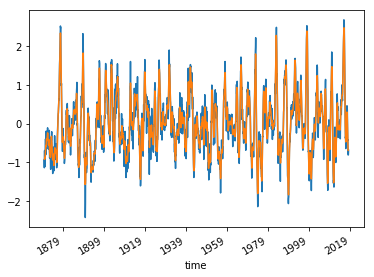

In [20]:
tmp = diagnostic.compute_nino34(sstanom_o_raw)
tmp_filt = tmp.rolling(time=5, center=True).mean()
tmp.plot()
tmp_filt.plot()

In [21]:
100 * (tmp.var() - tmp_filt.var()) / tmp.var()

<xarray.DataArray ()>
array(12.62938)

In [22]:
spectra_15 = diagnostic.pwelch(tmp, tmp, dim='time', nwindow=15*12, dx=1)
spectra_30 = diagnostic.pwelch(tmp, tmp, dim='time', nwindow=30*12, dx=1)

spectra_15filt = diagnostic.pwelch(tmp_filt, tmp_filt, dim='time', nwindow=15*12, dx=1)

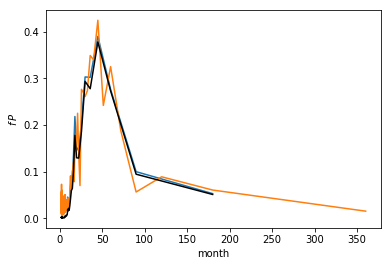

In [23]:
plt.plot(1/spectra_15.f_time, spectra_15.f_time * spectra_15)
plt.plot(1/spectra_30.f_time, spectra_30.f_time * spectra_30)
plt.plot(1/spectra_15filt.f_time, spectra_15filt.f_time * spectra_15filt, 'k-')
plt.xlabel('month')
plt.ylabel('$f \, P$');

## Plot timeseries

In [24]:
from matplotlib.collections import LineCollection

def plot_it_now(da, ax, colors, linewidth=1.0):
    if 'time' in da.dims:
        # convert dates to numbers first
        inxval = matplotlib.dates.date2num(da.time.to_index().to_pydatetime())
    else:
        inxval = da[da.dims[0]]
        
    points = np.array([inxval, da.values]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1],points[1:]], axis=1)

    lc = LineCollection(segments, cmap=colors, linewidth=linewidth)
    lc.set_array(inxval)
    ax.add_collection(lc)

    if 'time' in da.dims:
        monthFmt = matplotlib.dates.DateFormatter("%Y")
        ax.xaxis.set_major_formatter(monthFmt)
    ax.autoscale_view()
    return da
    
plot_it = lambda da, ax, colors: plot_it_now(utils.leadtime_to_datetime(da), ax=ax, colors=colors)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


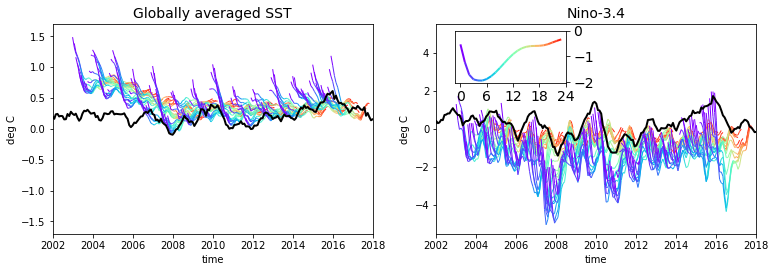

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})
    
obs = utils.calc_boxavg_latlon(utils.anomalize(sst_o_raw,sstclim_oh), [-60,60,0,360])
ax1 = axes[0]
glocean_f_full.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax1, colors='rainbow')
ax1.plot(obs.time,obs,'k-',linewidth=2)
ax1.set_xlim('2002','2018')
ax1.set_ylim(-1.7,1.7)
ax1.set_title('Globally averaged SST', fontsize=14)
ax1.set_xlabel('time')
ax1.set_ylabel('deg C')

obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
ax2 = axes[1]
nino34_f_full.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax2, colors='rainbow')
ax2.plot(obs.time,obs,'k-',linewidth=2)
ax2.set_xlim('2002','2018')
ax2.set_ylim(-5.5,5.5)
ax2.set_title('Nino-3.4', fontsize=14)
ax2.set_xlabel('time')
ax2.set_ylabel('deg C');

ax3 = fig.add_axes([0.585, 0.685, 0.14, 0.18])
plot_it_now(nino34_f_ym.mean(['init_year','init_month','ensemble']), 
            ax=ax3, colors='rainbow', linewidth=2.0)
ax3.set_xticks([0, 6, 12, 18, 24])
ax3.set_yticks([-2, -1, 0])
ax3.yaxis.tick_right()

# obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
# ax4 = axes[1,1]
# nino34_f_bc.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax4, colors='rainbow')
# ax4.plot(obs.time,obs,'k-',linewidth=2)
# ax4.set_xlim('2009','2012')
# ax4.set_ylim(-2.6,2.6)
# ax4.set_title('Nino-3.4, corrected', fontsize=14);
# ax4.set_xlabel('time')
# ax4.set_ylabel('deg C');
# ax4.set_xticks(['2009','2010','2011','2012'])

plt.tight_layout()
plt.savefig(saveloc + 'biases.png', dpi=600, format='png', bbox_inches='tight')

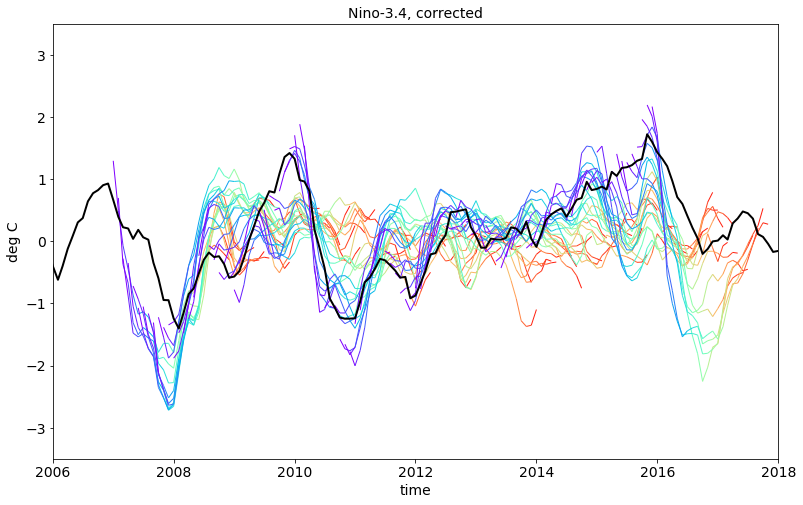

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 8))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})

obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
ax3 = axes
nino34_f_bc.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax3, colors='rainbow')
ax3.plot(obs.time,obs,'k-',linewidth=2)
ax3.set_xlim('2006','2018')
ax3.set_ylim(-3.5,3.5)
ax3.set_title('Nino-3.4, corrected', fontsize=14);
ax3.set_xlabel('time')
ax3.set_ylabel('deg C');

plt.savefig(saveloc + 'bias_corrected.png', dpi=600, format='png', bbox_inches='tight')

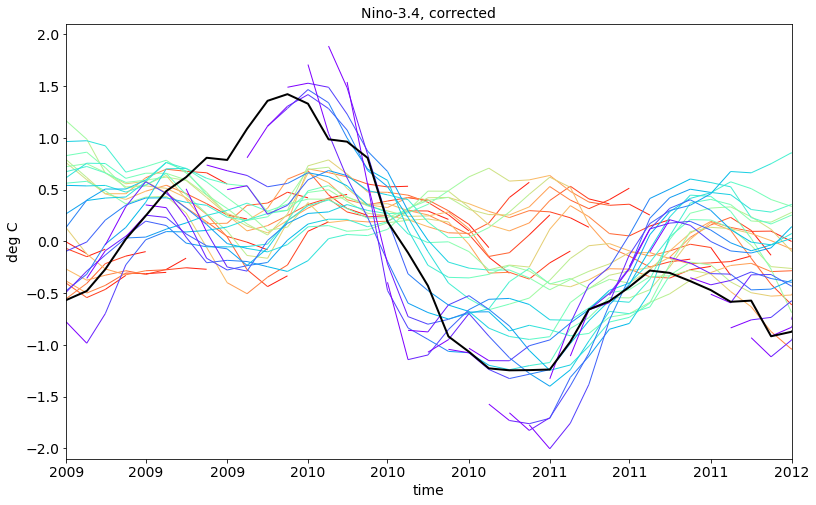

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 8))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})

obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
ax3 = axes
nino34_f_bc.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax3, colors='rainbow')
ax3.plot(obs.time,obs,'k-',linewidth=2)
ax3.set_xlim('2009','2012')
ax3.set_ylim(-2.1,2.1)
ax3.set_title('Nino-3.4, corrected', fontsize=14);
ax3.set_xlabel('time')
ax3.set_ylabel('deg C');

plt.savefig(saveloc + 'bias_corrected_2009-2012.png', dpi=600, format='png', bbox_inches='tight')

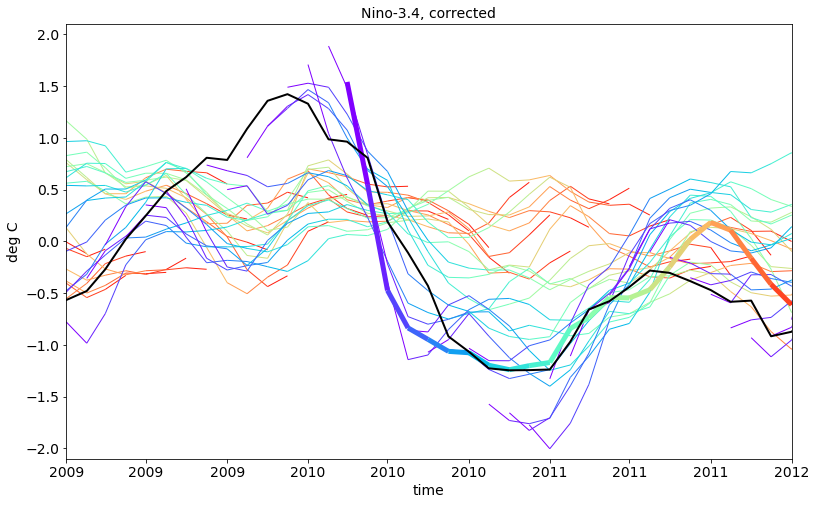

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 8))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})

obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
ax3 = axes
nino34_f_bc.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax3, colors='rainbow')
ax3.plot(obs.time,obs,'k-',linewidth=2)
ax3.set_xlim('2009','2012')
ax3.set_ylim(-2.1,2.1)
ax3.set_title('Nino-3.4, corrected', fontsize=14);
ax3.set_xlabel('time')
ax3.set_ylabel('deg C');

plot_it_now(utils.leadtime_to_datetime(nino34_f_bc.sel(init_date='2010-03').mean('ensemble').squeeze()), 
            ax=ax3, colors='rainbow', linewidth=5.0)

plt.savefig(saveloc + 'bias_corrected_2009-2012_bold.png', dpi=600, format='png', bbox_inches='tight')

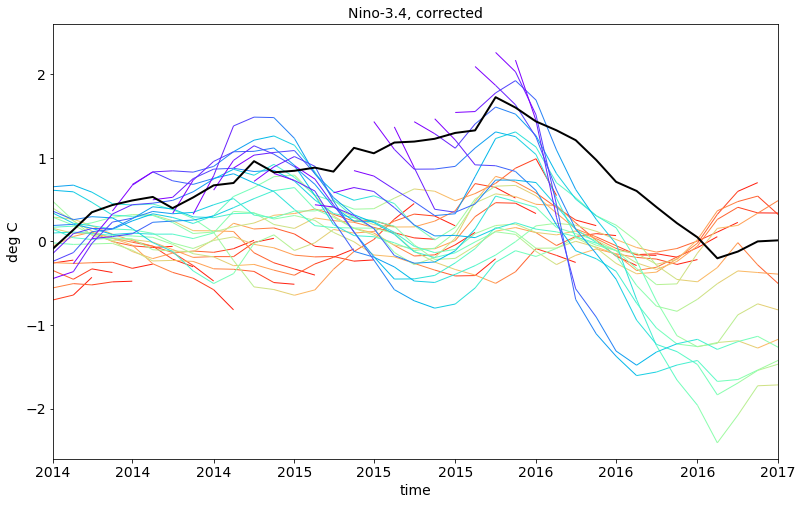

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 8))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})

obs = diagnostic.compute_nino4(utils.anomalize(sst_o_raw,sstclim_oh))
ax3 = axes
nino34_f_full_bc.mean('ensemble').groupby('init_date').apply(plot_it, ax=ax3, colors='rainbow')
ax3.plot(obs.time,obs,'k-',linewidth=2)
ax3.set_xlim('2014','2017')
ax3.set_ylim(-2.6,2.6)
ax3.set_title('Nino-3.4, corrected', fontsize=14);
ax3.set_xlabel('time')
ax3.set_ylabel('deg C');

plt.savefig(saveloc + 'bias_corrected_2014-2017.png', dpi=600, format='png', bbox_inches='tight')

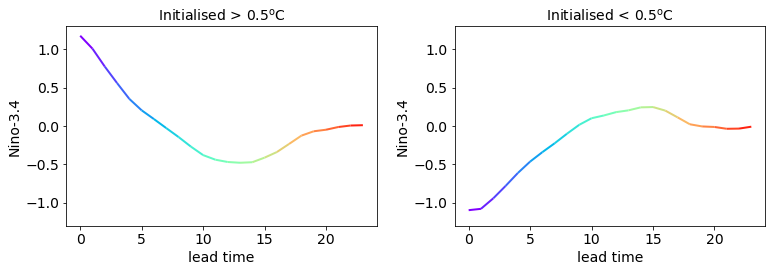

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 14})

ax1 = axes[0]
plot_it_now(nino34_f_bc_ym.where(nino34_f_bc_ym.isel(lead_time=0) > 0.5).mean(['init_year','init_month','ensemble']), ax=ax1, colors='rainbow',linewidth=2)
ax1.set_xlabel('lead time')
ax1.set_ylabel('Nino-3.4');
ax1.set_ylim(-1.3,1.3)
ax1.set_title('Initialised > 0.5$^\mathrm{o}$C', fontsize=14)

ax2 = axes[1]
plot_it_now(nino34_f_bc_ym.where(nino34_f_bc_ym.isel(lead_time=0) < -0.5).mean(['init_year','init_month','ensemble']), ax=ax2, colors='rainbow',linewidth=2)
ax2.set_xlabel('lead time')
ax2.set_ylabel('Nino-3.4');
ax2.set_ylim(-1.3,1.3)
ax2.set_title('Initialised < 0.5$^\mathrm{o}$C', fontsize=14)

plt.tight_layout()
plt.savefig(saveloc + 'model_preference.png', dpi=600, format='png', bbox_inches='tight')

In [18]:
files = ['/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r1i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r2i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r3i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r4i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r5i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r6i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r7i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r8i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r9i1p1_201101-201809.nc',
'/OSM/CBR/OA_DCFP/data2/model_output/nmme/phase1/CMC_CanCM4/monthly/sst_mon_CanCM4_201101_r10i1p1_201101-201809.nc']

In [25]:
test = xr.open_mfdataset(files, decode_times=False)['sst']

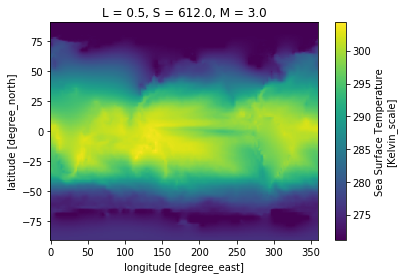

In [29]:
test.isel(L=0, S=0, M=2).plot()